# taq_cross_response_year_avg_time_shift_plot

#### Juan Camilo Henao Londono - 26.06.2019
#### AG Guhr - Universitaet Duisburg-Essen

In the following [link]() can be seen the plot of the function's results

In [1]:
# Modules

import numpy as np
from matplotlib import pyplot as plt
import os

import pickle

import taq_data_tools

__tau__ = 1000

In [2]:
def taq_cross_response_year_avg_time_shift_plot(ticker_i, ticker_j, year,
                                                taus):
    """
    Plot the average cross response during a month and the dayly cross-response
    contributions in a figure. The data is loaded from the cross response data
    results.
        :param ticker_i: string of the abbreviation of the midpoint stock to
         be analized (i.e. 'AAPL')
        :param ticker_j: string of the abbreviation of the midpoint stock to
         be analized (i.e. 'AAPL')
        :param year: string of the year to be analized (i.e '2008')
    """

    if (ticker_i == ticker_j):

        return None

    else:

        try:

            function_name = taq_cross_response_year_avg_time_shift_plot. \
                            __name__
            taq_data_tools.taq_function_header_print_plot(function_name,
                                                          ticker_i, ticker_j,
                                                          year, '', '')

            figure = plt.figure(figsize=(9, 16))

            for tau_idx, tau_val in enumerate(taus):

                ax = plt.subplot(len(taus), 1, tau_idx + 1)

                times = np.array(range(- 10 * tau_val, 10 * tau_val, 1))
                cross = pickle.load(open(''.join((
                                   '../../taq_data/time_shift_data_{2}/taq'
                                   + '_cross_response_year_time_shift_data_tau'
                                   + '_{3}/taq_cross_response_year_time_shift'
                                   + '_data_tau_{3}_{2}_{0}i_{1}j.pickle')
                                   .split())
                                   .format(ticker_i, ticker_j, year, tau_val),
                                   'rb'))

                max_pos = np.where(max(cross) == cross)[0][0]

                ax.plot(times, cross, linewidth=5, label=r'{} - {}'
                        .format(ticker_i, ticker_j))
                ax.plot((times[max_pos], times[max_pos]), (0, cross[max_pos]),
                        '--', label=r'Max position $t$ = {}'
                        .format(max_pos - 10 * tau_val))
                ax.legend(loc='best', fontsize=15)
                ax.set_title(r'$\tau$ = {}'.format(tau_val), fontsize=20)
                ax.set_xlabel(r'Time shift $[s]$', fontsize=15)
                ax.set_ylabel(r'$R_{ij}(\tau)$', fontsize=15)
                plt.xticks(fontsize=10)
                plt.yticks(fontsize=10)
                ax.grid(True)
                plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
                plt.tight_layout()

            # Plotting
            taq_data_tools.taq_save_plot(function_name, figure, ticker_i,
                                         ticker_j, year, '')

            return None

        except FileNotFoundError as e:
            print('No data')
            print(e)
            print()
            return None

TAQ data
taq_cross_response_year_avg_time_shift_plot
Processing plot for the stock i AAPL and stock j MSFT the 2008..
Plot saved



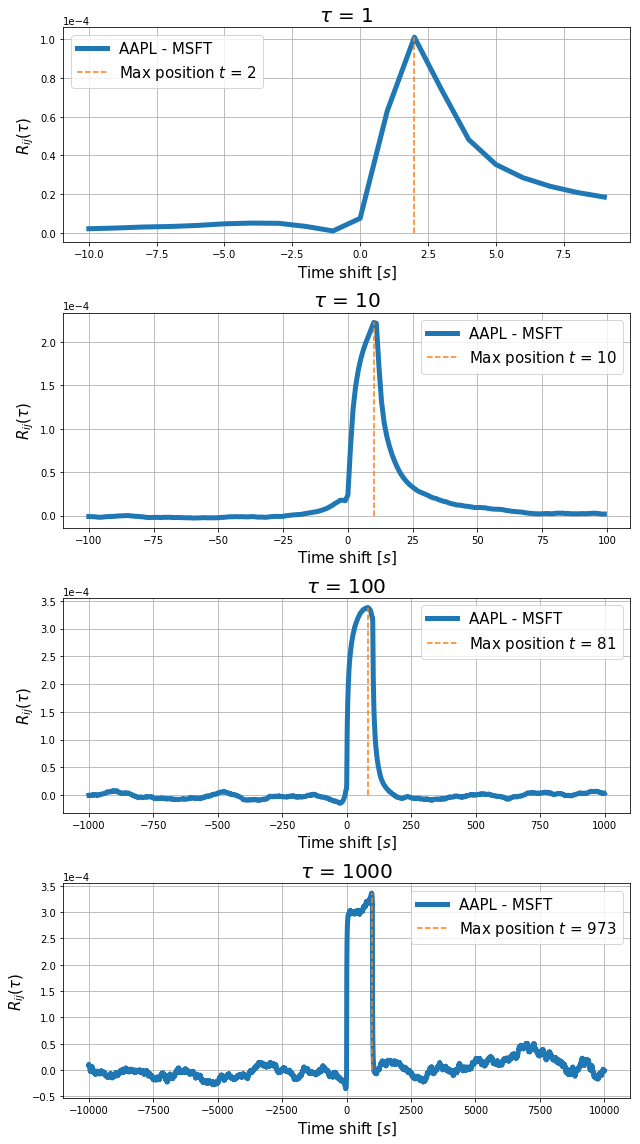

In [3]:
# Test

ticker_i = 'AAPL'
ticker_j = 'MSFT'
year = '2008'
taus = [1, 10, 100, 1000]

taq_cross_response_year_avg_time_shift_plot(ticker_i, ticker_j, year, taus)